In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
 x = np.linspace(0,3,100)

In [4]:
eps = np.random.normal(loc=0, scale =0.1, size=100)

In [5]:
y = x*np.sin(x)+eps

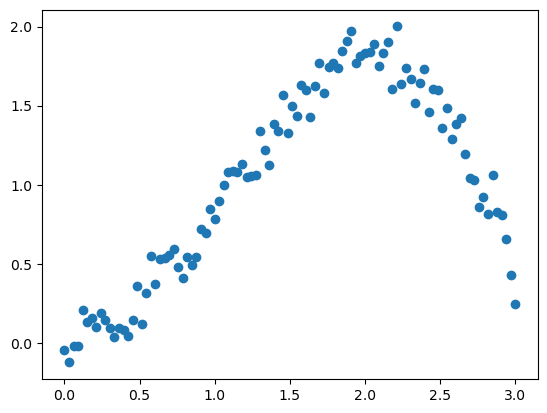

In [6]:
plt.scatter(x,y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, test_size=0.25, random_state=0)

In [9]:
print(str(X_train.shape) + str(y_train.shape))

(75,)(75,)


In [10]:
x_train, X_cv, Y_train, y_cv = train_test_split(X_train, y_train, train_size=0.67, test_size=0.33, random_state=0)

In [11]:
print(str(X_cv.shape) + str(y_cv.shape))

(25,)(25,)


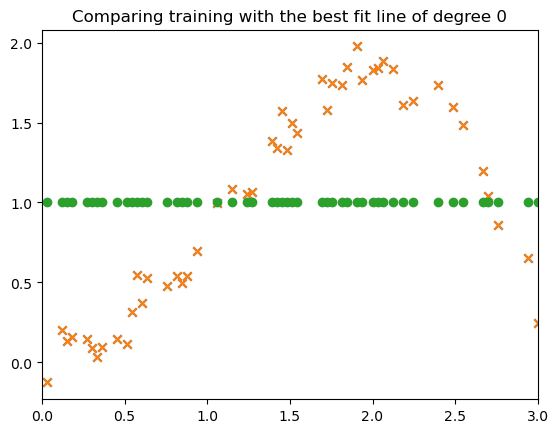

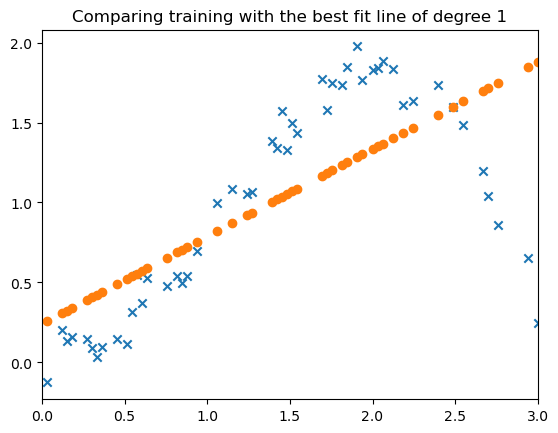

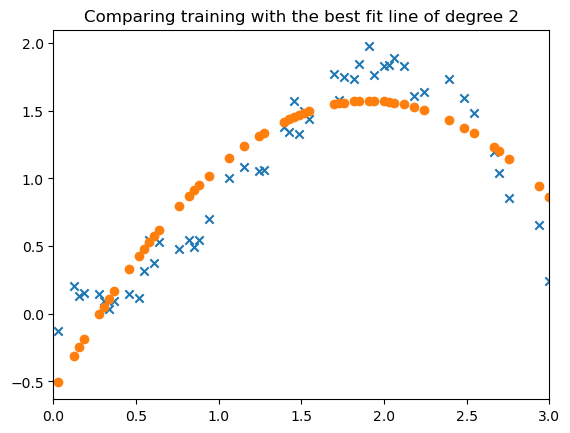

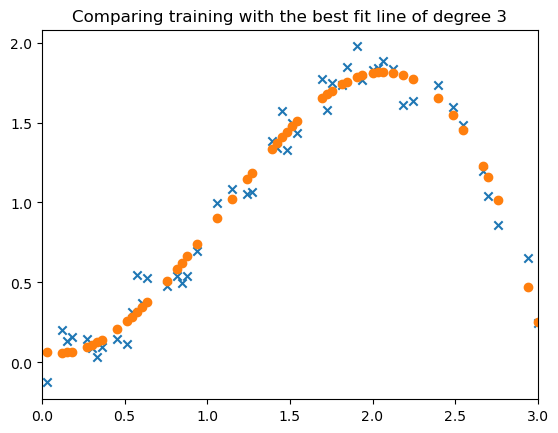

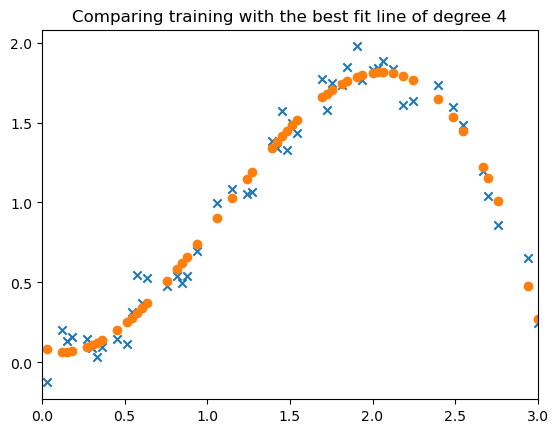

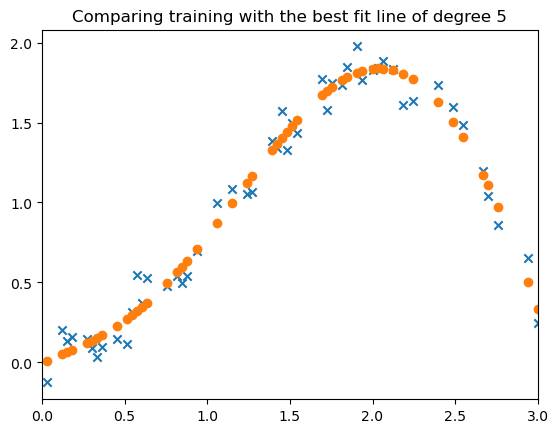

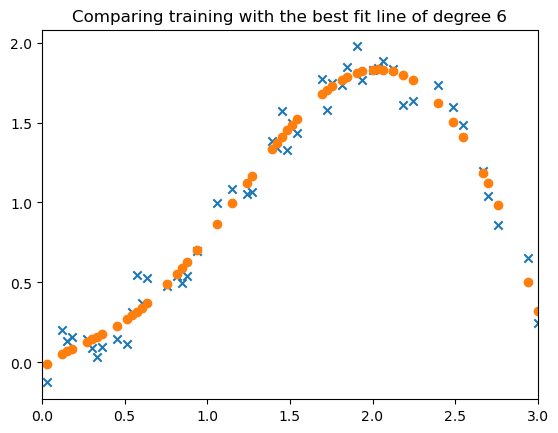

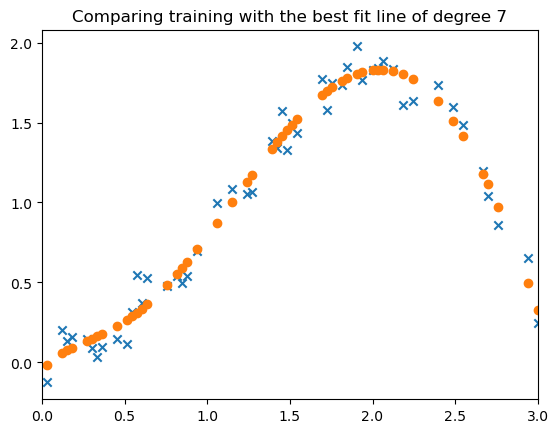

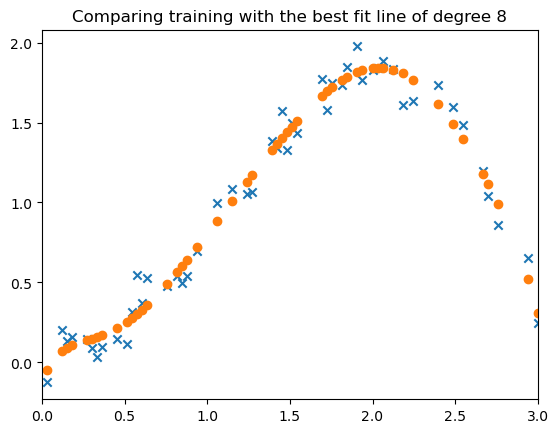

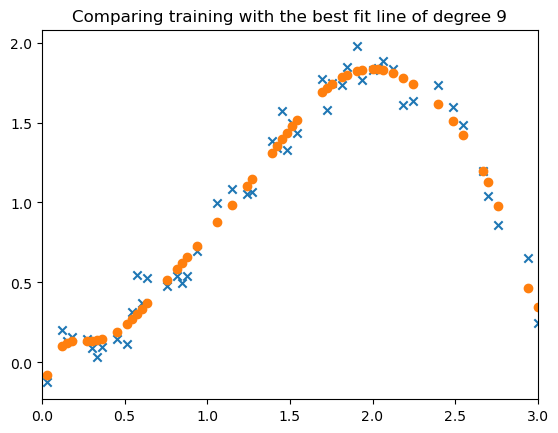

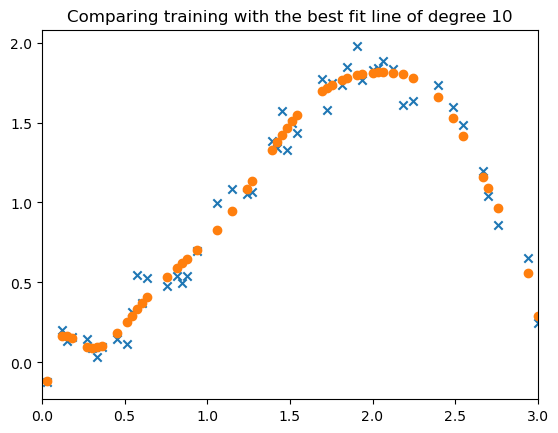

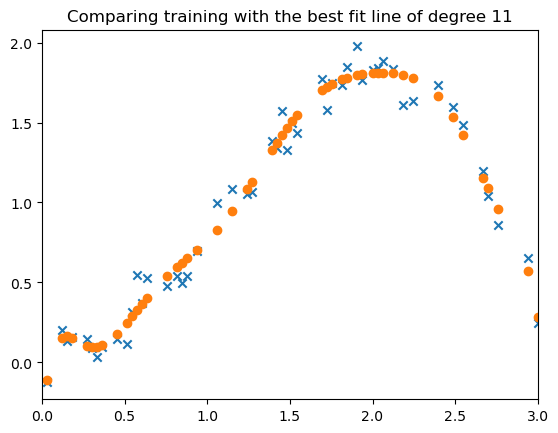

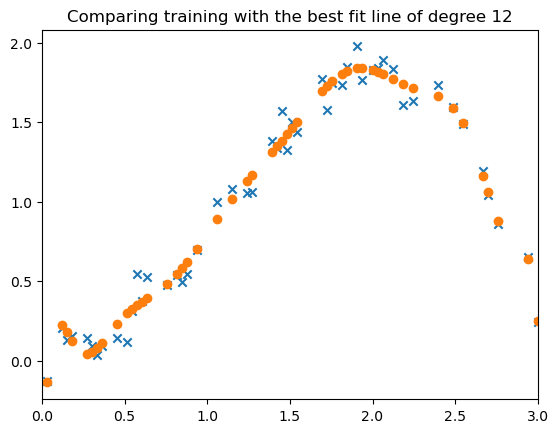

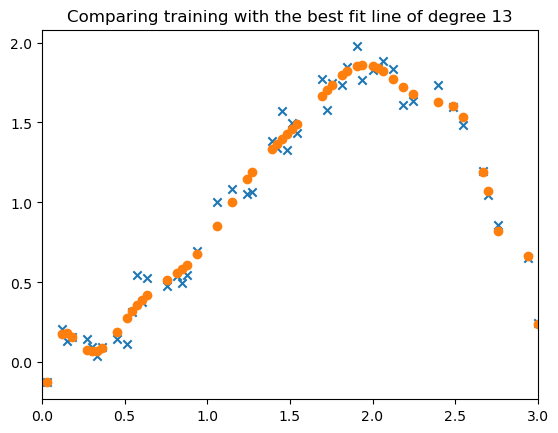

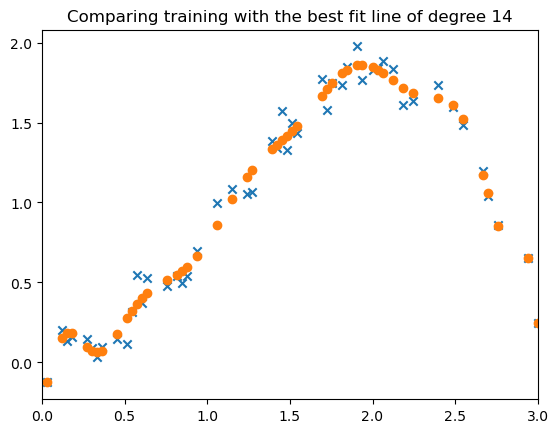

In [22]:
plt.scatter(x_train, Y_train, marker="x")
yrmse_train = []
for n in range (0,15):
    p = np.polyfit(x_train, Y_train, n)
    poly = np.poly1d(p)
    xmse_train = sklearn.metrics.mean_squared_error(Y_train, poly(x_train))
    xrmse_train = np.sqrt(xmse_train)
    yrmse_train.append(xrmse_train)
    plt.scatter(x_train, Y_train, marker="x")
    plt.scatter(x_train, poly(x_train), marker="o")
    plt.title("Comparing training with the best fit line of degree " + str(n))
    plt.xlim(0,3)
    plt.show()

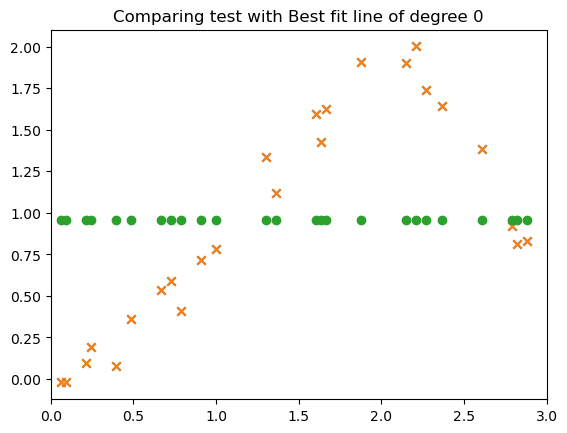

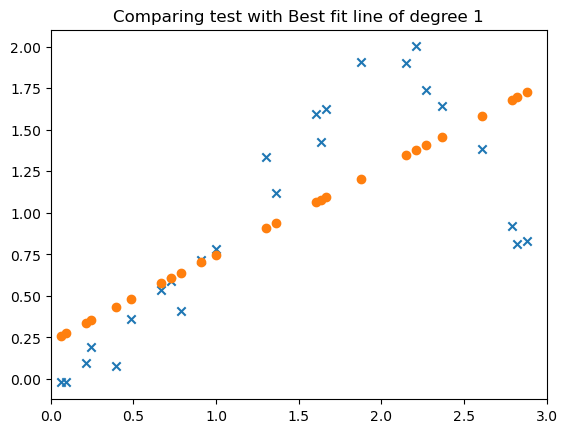

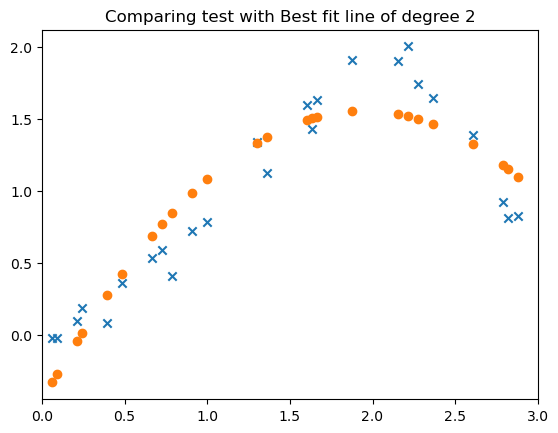

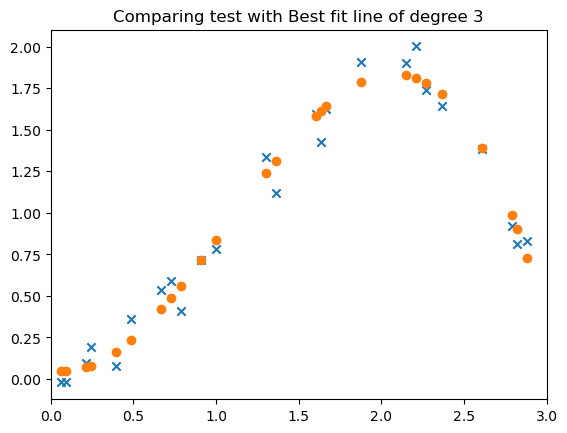

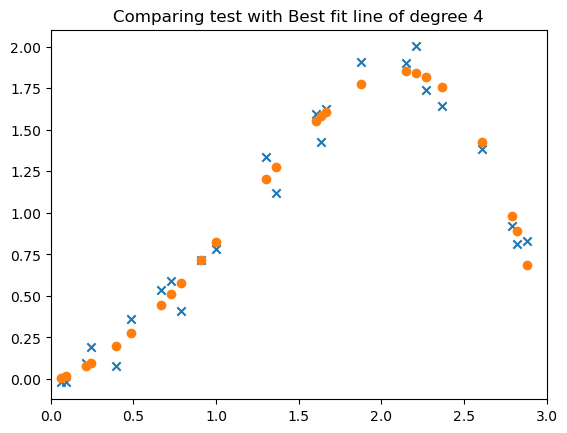

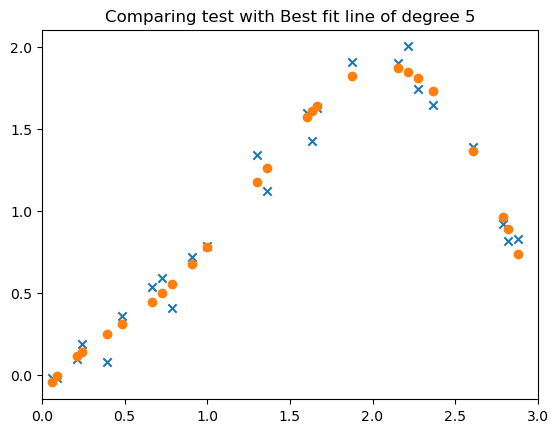

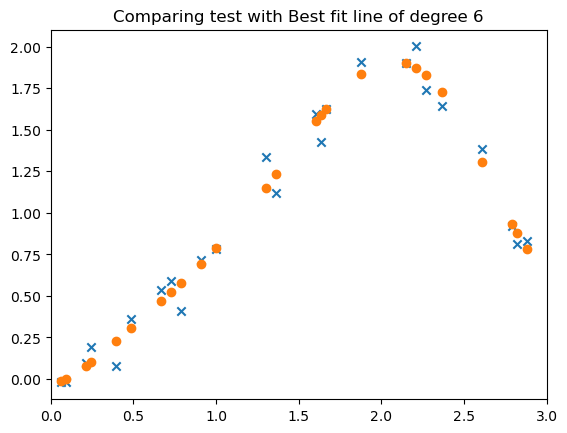

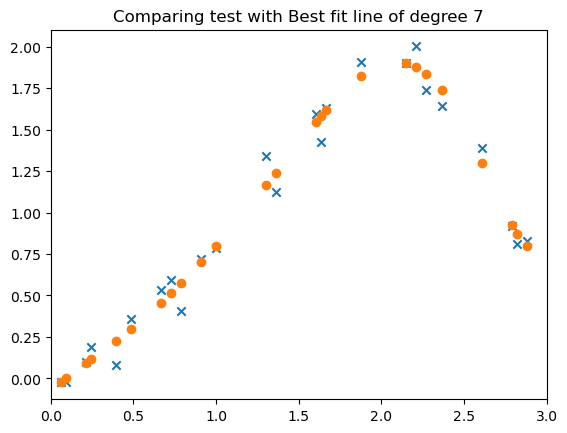

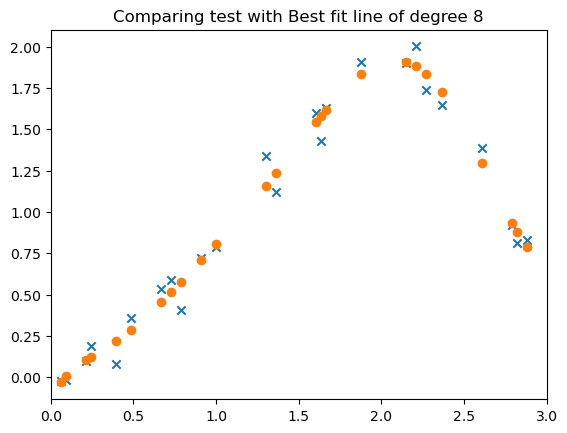

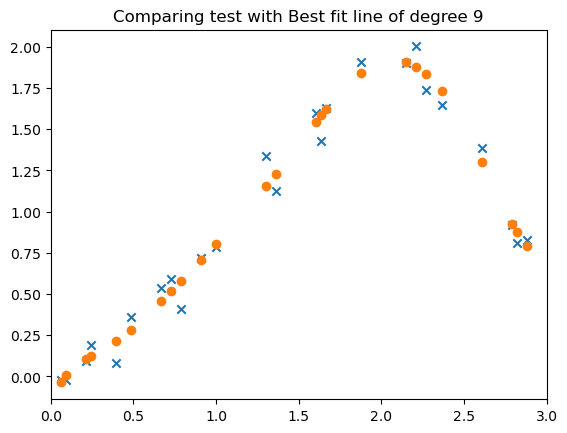

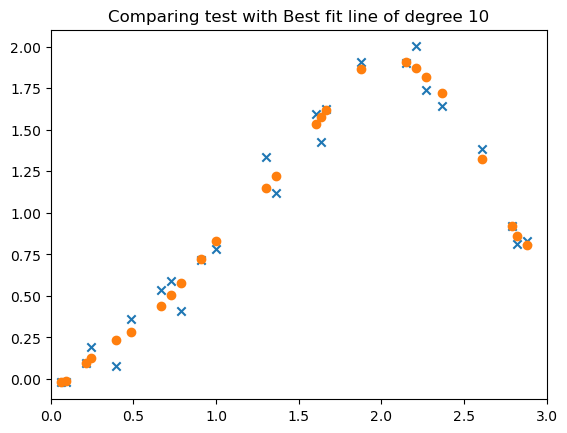

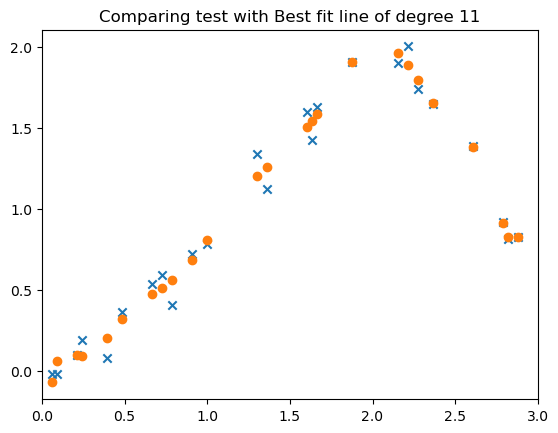

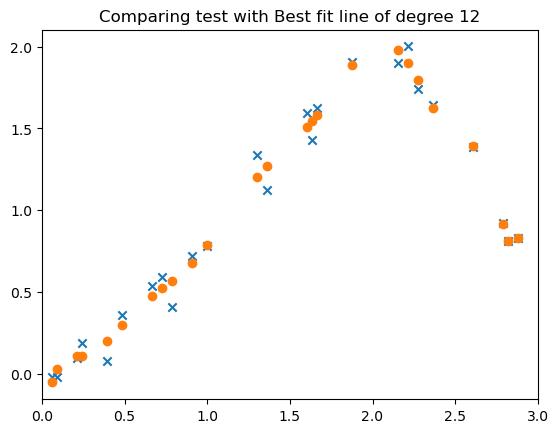

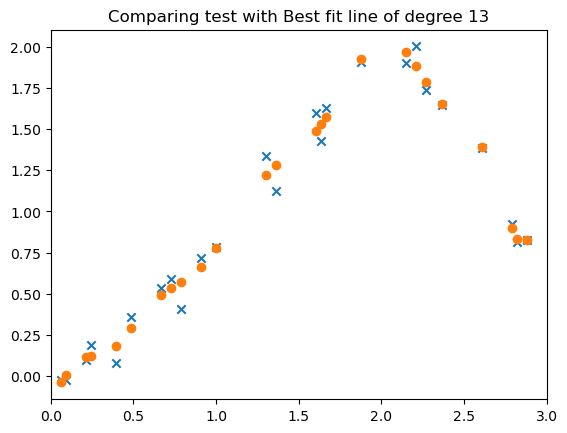

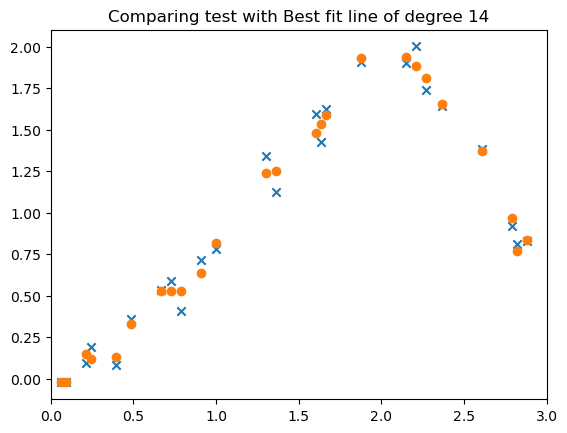

In [13]:
plt.scatter(X_test,y_test,marker="x")
for n in range(0,15):
  p = np.polyfit(X_test,y_test,n)
  poly = np.poly1d(p)
  plt.scatter(X_test,y_test, marker ="x")
  plt.scatter(X_test, poly(X_test),marker="o")
  plt.title("Comparing test with Best fit line of degree " + str(n))
  plt.xlim(0,3)
  plt.show()

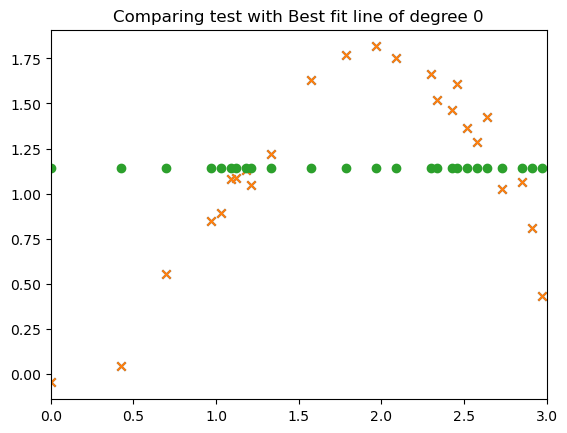

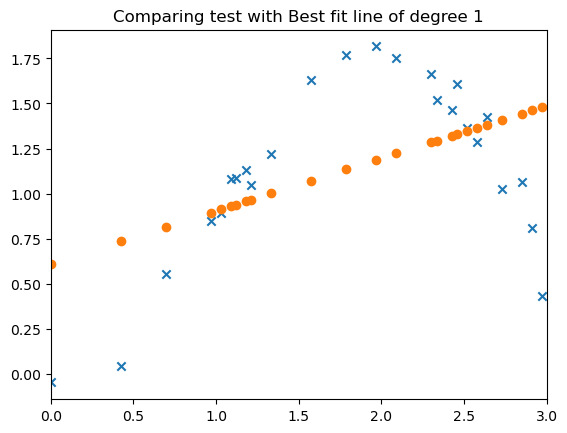

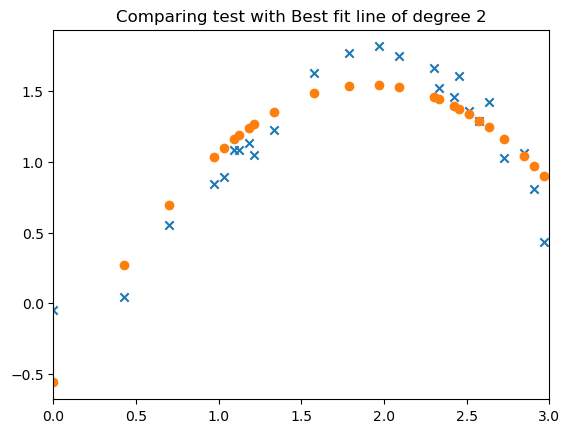

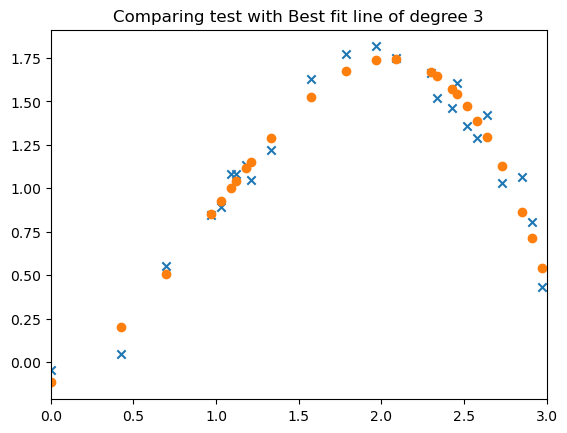

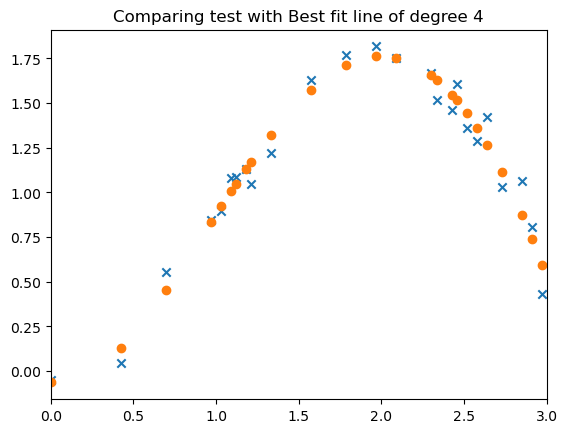

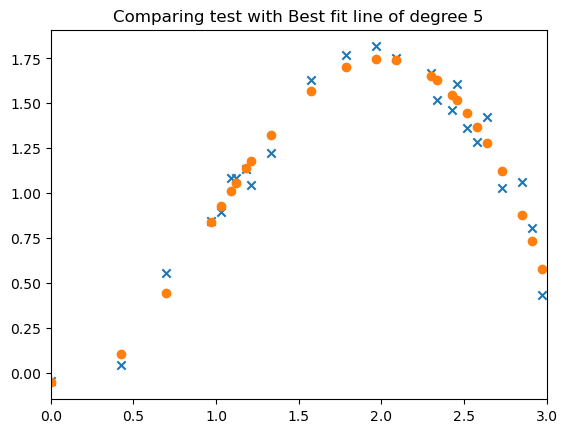

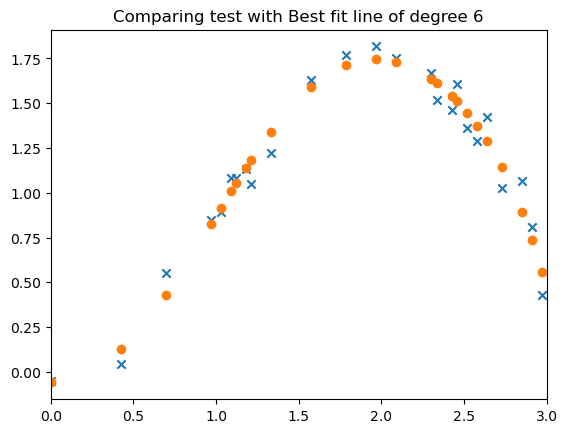

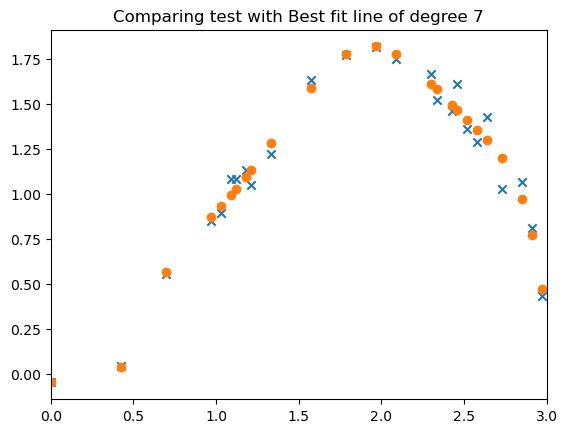

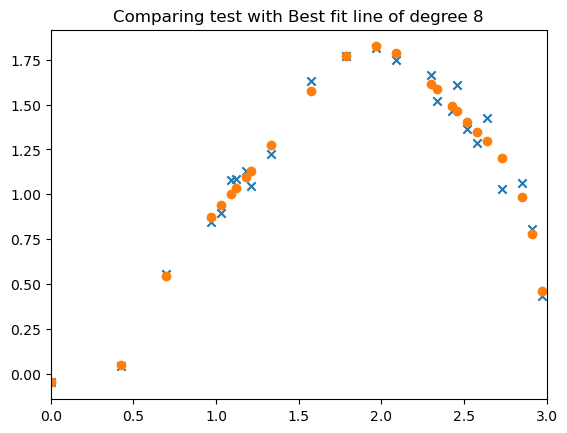

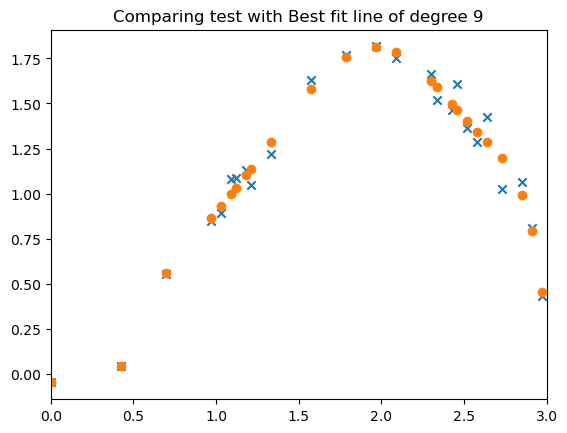

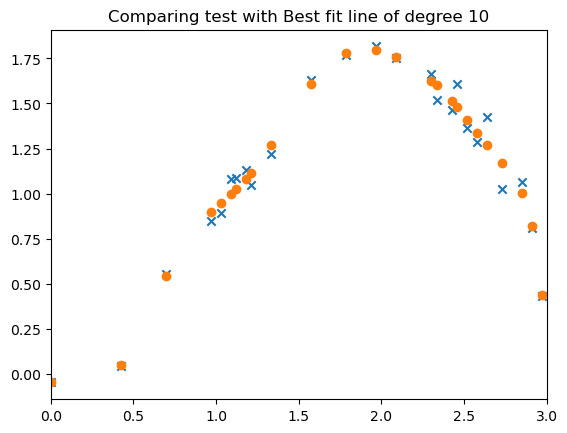

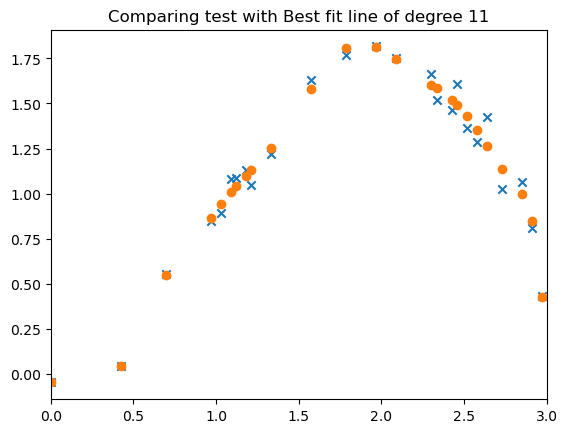

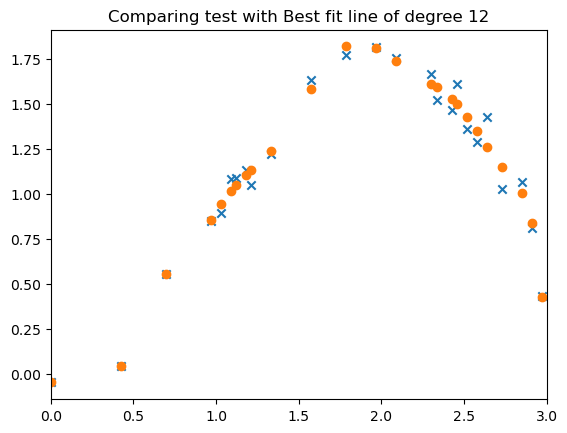

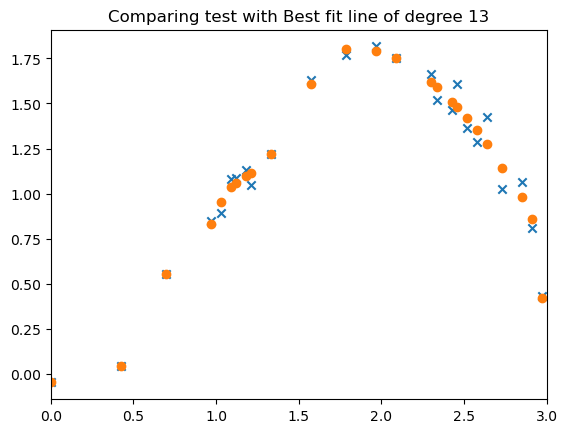

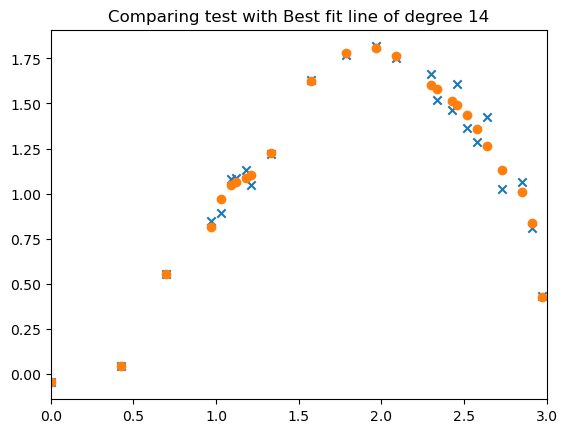

In [14]:
plt.scatter(X_cv,y_cv,marker="x")
for n in range(0,15):
  p = np.polyfit(X_cv,y_cv,n)
  poly = np.poly1d(p)
  plt.scatter(X_cv,y_cv, marker ="x")
  plt.scatter(X_cv, poly(X_cv),marker="o")
  plt.title("Comparing test with Best fit line of degree " + str(n))
  plt.xlim(0,3)
  plt.show()

In [18]:
import sklearn

yrmse_cv = []
for n in range (0,15):
    p = np.polyfit(x_train, Y_train, n)
    poly = np.poly1d(p)
    xmse_cv = sklearn.metrics.mean_squared_error(y_cv, poly(X_cv))
    xrmse_cv = np.sqrt(xmse_cv)
    yrmse_cv.append(xrmse_cv)

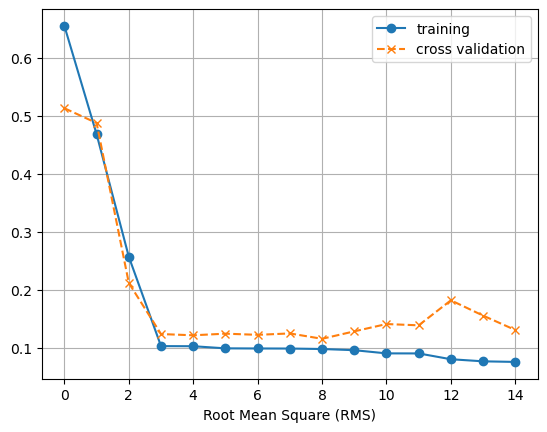

In [21]:
plt.plot(yrmse_train, label="training", marker="o")
plt.plot(yrmse_cv, label="cross validation", marker="x", linestyle="--")
plt.xlabel("Polynomial Degree")
plt.xlabel("Root Mean Square (RMS)")
plt.legend()
plt.grid()
plt.show()